# Exercice 3

#### Les résultats se retrouve en faisant un produit tensoriel entre la matrice d'Hadamard et la matrice I. On fait ensuite le produit tensoriel entre le résultat obtenue et la matrice C-NOT. Chaque colonne de cette matrice représente un état de Bell.

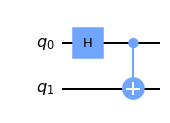

In [1]:
import numpy as np
from qiskit import QuantumCircuit, BasicAer, execute
#Création d’un circuit quantique instance de QuantumCircuit
circ = QuantumCircuit(2)
#Ajouter une porte H pour l’entrée (qubit) 0 => superposition
circ.h(0)
# Ajouter l’opération CNOT avec 0 comme qubit de control et le qubit 1 comme cible
# => état de Bell
circ.cx(0, 1)
circ.draw('mpl')

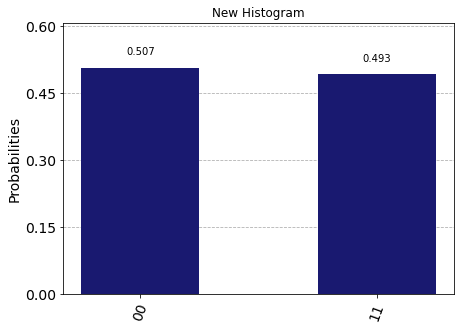

In [2]:
from qiskit import QuantumCircuit, BasicAer, execute
from qiskit.visualization import plot_histogram
%matplotlib inline

qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.measure([0, 1], [0, 1])

backend = BasicAer.get_backend('qasm_simulator')
job = execute(qc, backend)
plot_histogram(job.result().get_counts(), color='midnightblue', title="New Histogram")

C:\Users\tlemo\anaconda3\envs\ENV_NAME\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


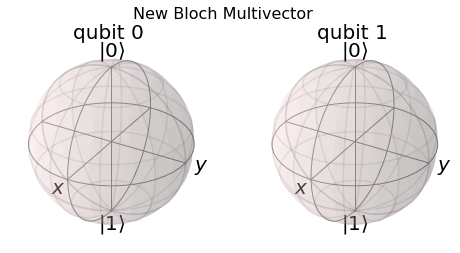

In [3]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
%matplotlib inline

state = Statevector.from_instruction(circ)
plot_bloch_multivector(state, title="New Bloch Multivector", reverse_bits=False)

C:\Users\tlemo\anaconda3\envs\ENV_NAME\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


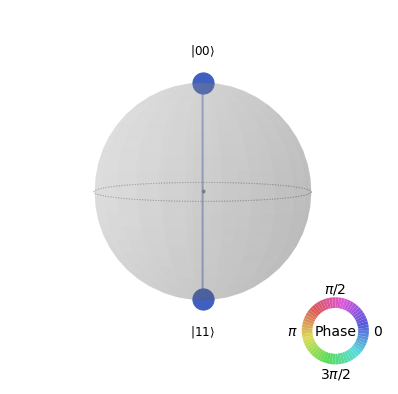

In [4]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere
state = Statevector.from_instruction(circ)
plot_state_qsphere(state)

Impossible de se connecter sur le provider d'IBM.

In [5]:
# Ne fonctionne pas

IBMQ.save_account('mytoken')
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_bogota') # check which one has 0 jobs on queue
job = execute(circ, backend=qcomp)
q_result = job.result()
visualization.plot_histogram(q_result.get_counts(circ))

NameError: name 'IBMQ' is not defined

# Exercice 4

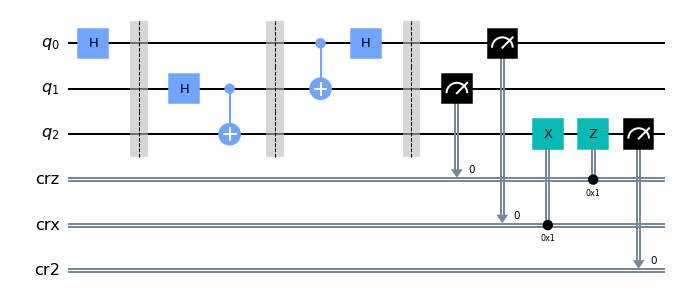

In [50]:
import numpy as np
from qiskit import *
from qiskit.visualization import plot_histogram

qr = QuantumRegister(3, name="q")    # Protocol uses 3 qubits
crz = ClassicalRegister(1, name="crz") # and 2 classical bits
crx = ClassicalRegister(1, name="crx") # in 2 different registers
cr2 = ClassicalRegister(1, name="cr2")
circ = QuantumCircuit(qr, crz, crx, cr2)

circ.h(0)

circ.barrier()
circ.h(1)
circ.cx(1,2)

circ.barrier()
circ.cx(0, 1)
circ.h(0)

circ.barrier()
circ.measure(1, 0)
circ.measure(0, 1)


circ.x(2).c_if(crx, 1)
circ.z(2).c_if(crz, 1)

circ.measure(2,2)

circ.draw('mpl')

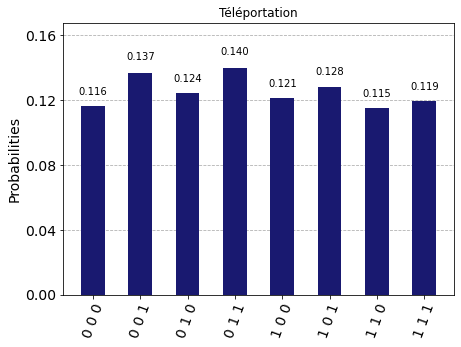

In [51]:
backend = BasicAer.get_backend('qasm_simulator')
job = execute(circ, backend)
plot_histogram(job.result().get_counts(), color='midnightblue', title="Téléportation")